# Time Series Forecasting using ARIMA

**Links!** <br>
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

**Better Links**<br>
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [29]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')


# warnings.filterwarnings("ignore")
# import matplotlib
# matplotlib.rcParams['axes.labelsize'] = 14
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['text.color'] = 'k'

## The Data

In [30]:
# Using statsmodels dataset on CO2 in the atmosphere
data=sm.datasets.co2.load_pandas()
y=data.data
y.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


## Data preprocessing

Transform daily sales to monthly average sales

In [31]:
y=y['co2'].resample('MS').mean()

Check for null values and fill with the previous value if found

In [32]:
y.isnull().values.any()

True

In [33]:
y=y.fillna(y.bfill())

In [34]:
y.isnull().values.any()

False

## Visualize Time Series

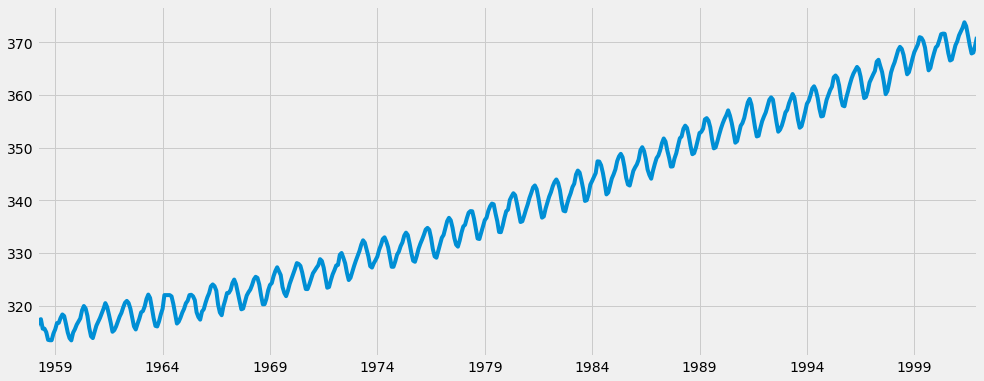

In [35]:
y.plot(figsize=(15,6))
plt.show()

Decompose time series

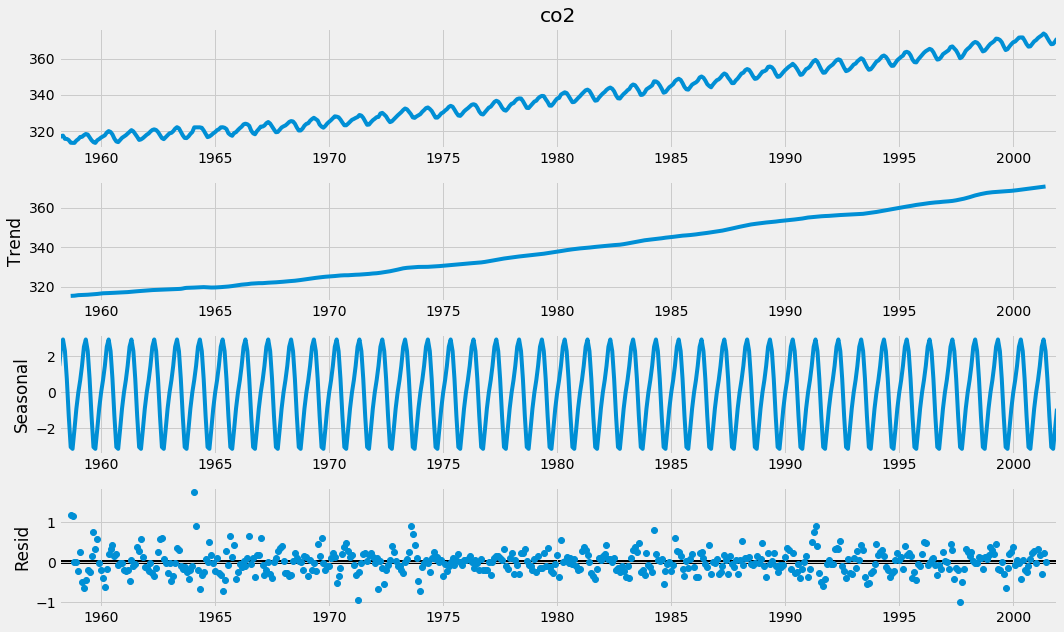

In [36]:
from pylab import rcParams
rcParams['figure.figsize']=15,9

decomposition=sm.tsa.seasonal_decompose(y,model='additive')
fig=decomposition.plot()
plt.show()

## Time Series Forecasting

Auto Regressive Integrated Moving Average is a function of
- P: Auto-regressive portion - incorporates effects of past values into model - warm tomorrow if it's been warm for the past few days
- D: Integrated portion - Amount of differencing to incorporate - number of past time points to subtract from current value - same temperature tomorrow if the difference in tempurature has been very small over the past 3 days
- Q: Moving average portion - set error of model as linear combination of error values observed at previous time points

Grid search hyper parameter optimization for model selection

In [37]:
# Start by generating all of these combinations
# Set a range from 0 to 2 for each of the parameters
p=d=q=range(0,2)

# Create iterative lists
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [38]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Parameters selection using grid search. Compare the models against each other by how well they fit the data or how well it predicts future data points. AIC measures how well a model fits the data while taking into account model complexity. A model with more features or a model that has a poor fit will yield a higher AIC. We want a lower AIC.

In [39]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343623902027
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172764134
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320021
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878554753743
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578977746117
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.764791265367
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754479638
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327081003
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066995387
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716875377
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1087.1396972557027
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4315957434592
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893630605
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988957436
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194094
A

## Fit the ARIMA model

In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3181      0.092      3.441      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.808      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


**Model Diagnostics**

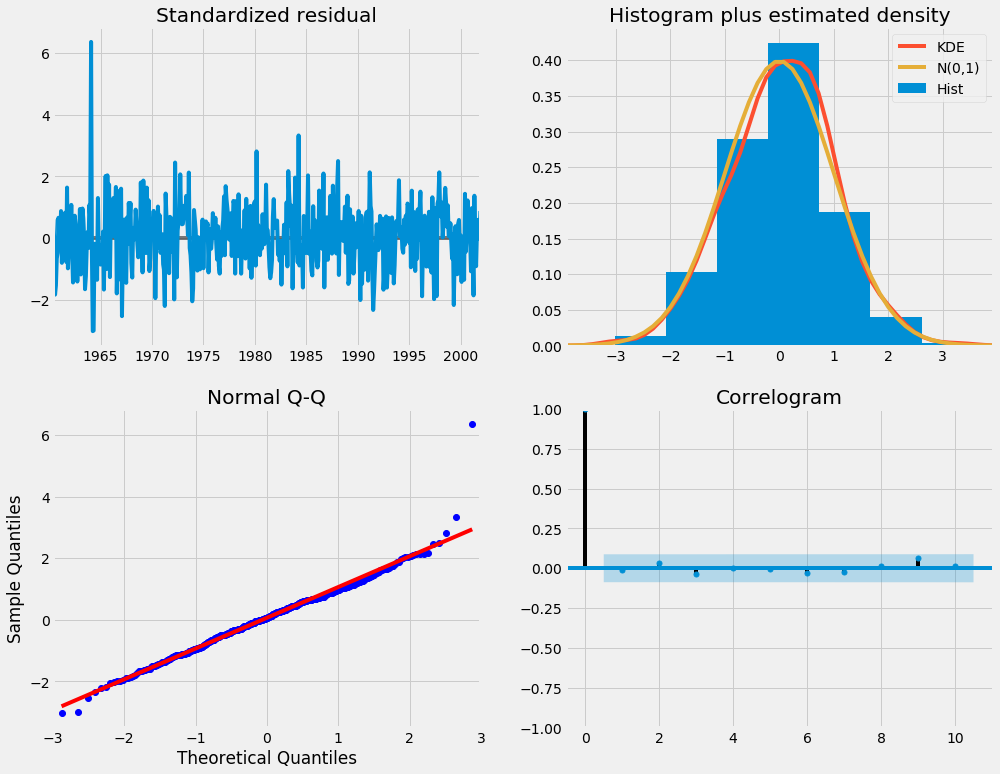

In [42]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

1. Ensure residuals are uncorrelated and normally distributed with zero-mean <br>
    a. Top right plot - KDE line follows closely with the N(0,1) line. N(0,1)=standard notation for a normal distribution with mean 0 and sd 1. So the residuals are normally distributed. Yippy! <br>
    b. qq-plot in bottom left shows ordered distribution of residuals follows the red trend line taken from samples of a normal distribution <br>
    c. residuals over time in top left don't display any seasonality and appear to be white noise. Confirm this in the correlogram, viewing the autocorrelation on the bottom right, which shows time series residuals have low correlated with lagged versions of itself.
***

## Validate forecast

In [44]:
# Forecast starts at 1/98
# dynamic False ensures one-step ahead forecasts are produced; each point is generated using the entire history
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

Plot forecasted values

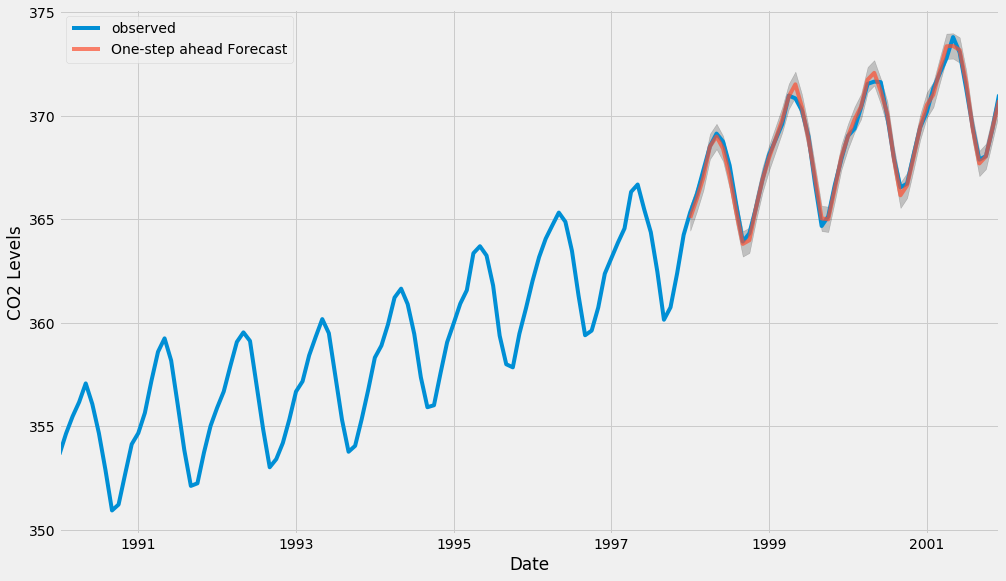

In [45]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

Forecasted values started at 1998, looks to be pretty accurate
***
Now quantify the accuracy

In [46]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


Produce dynamic forecasts. Forecasts are generated using values from previous forecasted time points.

In [48]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

Plot the observed values adn the dynamic forecast

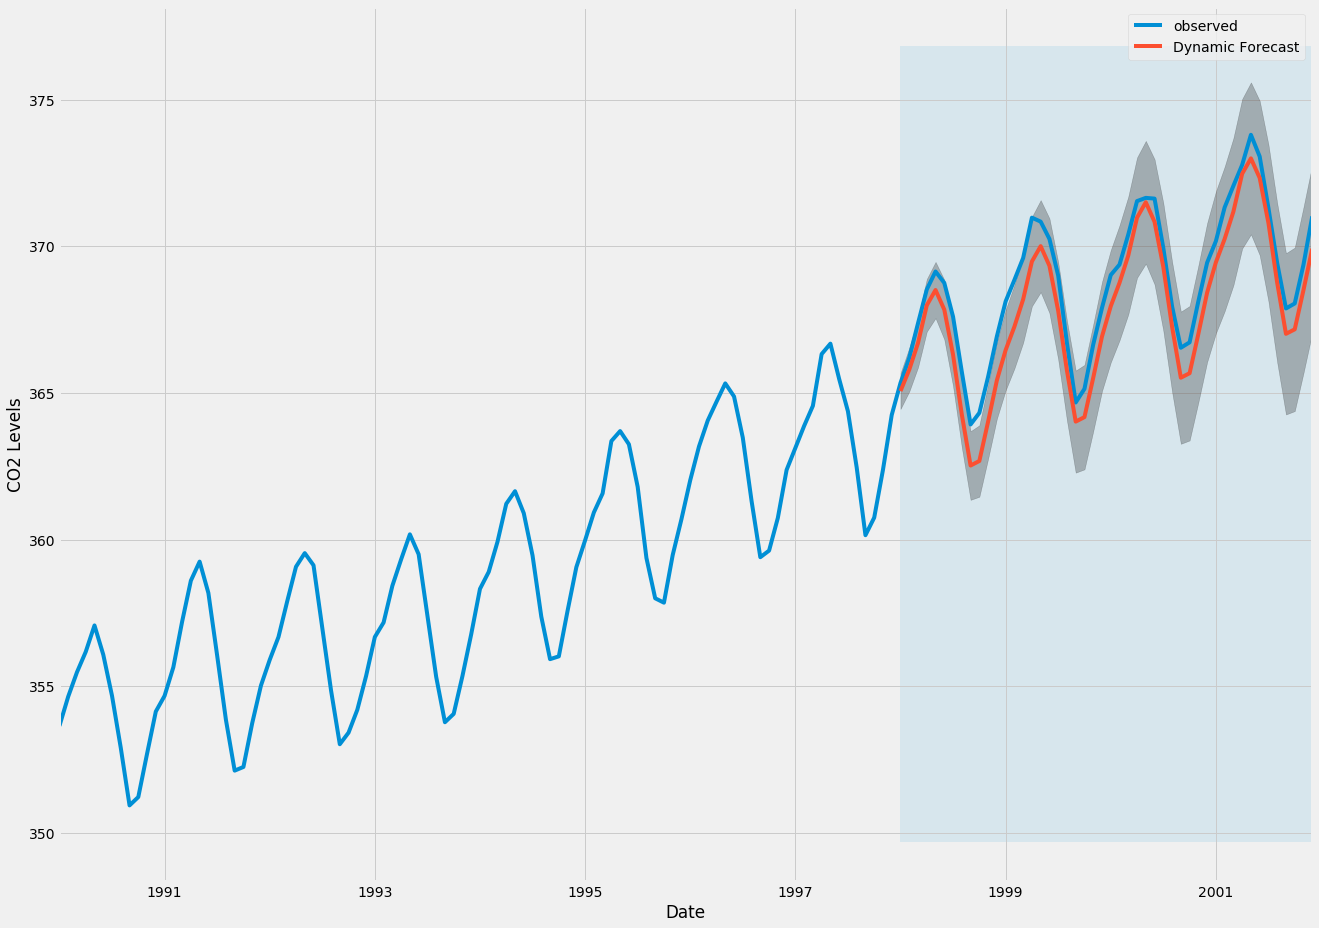

In [50]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [51]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


The MSE is higher, which makes sense since we are relying on less historical data from the time series. Both Dyanmic and one-step ahead validate the forecasts accuracy.
***

## Producing and Visualizing Forecasts

In [52]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

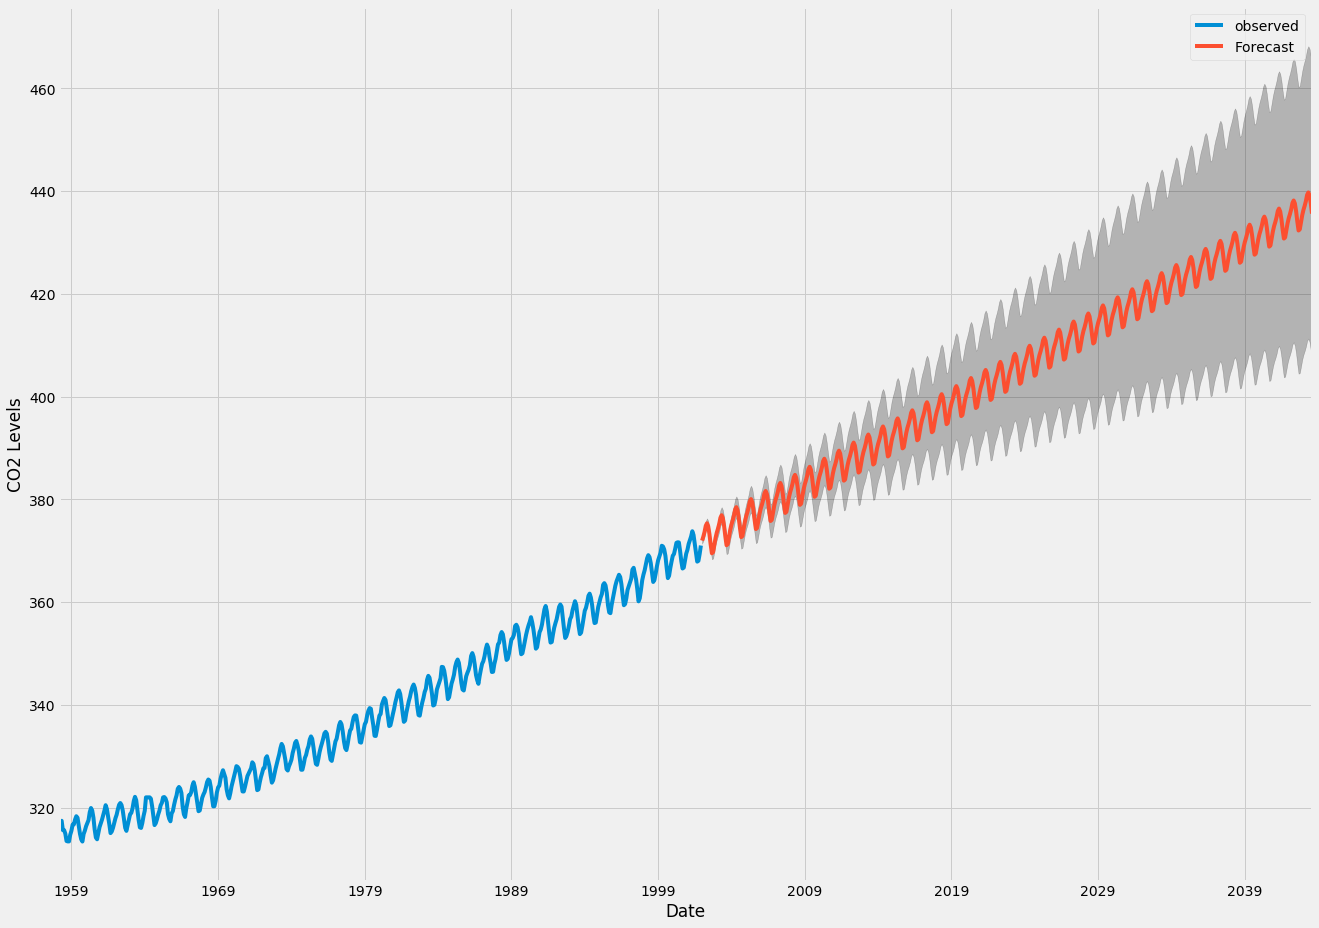

In [53]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()